=== Izračun plošččnine elipse ===
Prava plošččina elipse: 6.28319
         N      MC area    Napaka MC    Grid area  Napaka grid
      1000      6.19200      0.09119      5.86889      0.41430
MC: 0.00000 s, Grid: 0.00100 s
     10000      6.34240      0.05921      6.13440      0.14879
MC: 0.00100 s, Grid: 0.00000 s
    100000      6.27112      0.01207      6.24035      0.04284
MC: 0.00400 s, Grid: 0.00300 s
   1000000      6.28737      0.00418      6.27011      0.01307
MC: 0.04401 s, Grid: 0.02201 s

=== Izračun volumna elipsoida ===
Pravi volumen elipsoida: 12.56637
         N    MC volume       Napaka
     10000     12.57600      0.00963
MC: 0.00099 s
    100000     12.61392      0.04755
MC: 0.00799 s
   1000000     12.56158      0.00479
MC: 0.06100 s


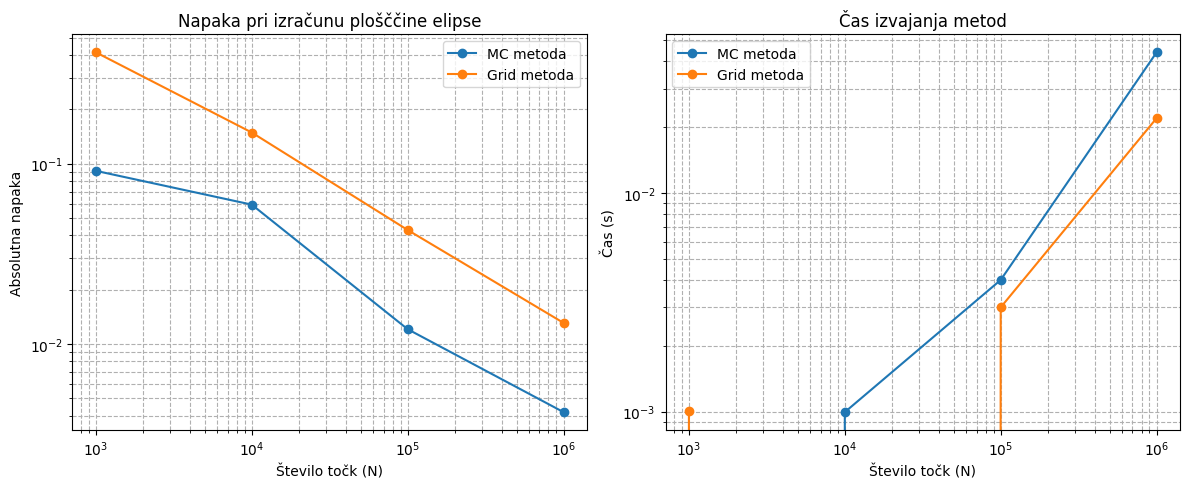

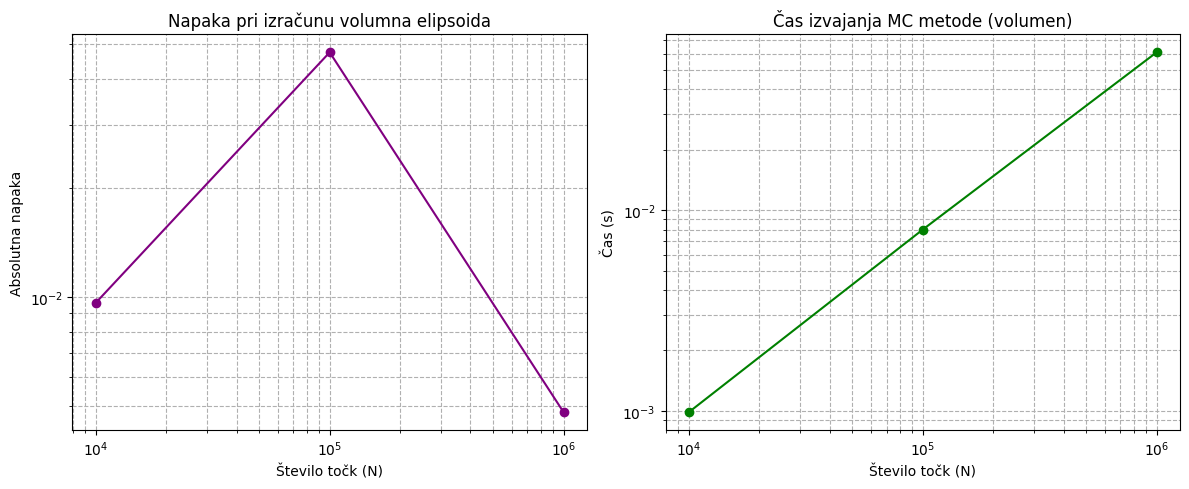

In [19]:
import numpy as np
import time
import math
import matplotlib.pyplot as plt

def ellipse_area_mc(a, b, N):
    
    x = np.random.uniform(-a, a, N)
    y = np.random.uniform(-b, b, N)
    
    inside = (x**2/(a**2) + y**2/(b**2)) <= 1
    box_area = 4 * a * b
    
    area_estimate = box_area * np.sum(inside) / N
    return area_estimate

def ellipse_area_grid(a, b, N):
    
    n = int(np.sqrt(N))
    x = np.linspace(-a, a, n)
    y = np.linspace(-b, b, n)
    X, Y = np.meshgrid(x, y)
    inside = (X**2/(a**2) + Y**2/(b**2)) <= 1
    box_area = 4 * a * b
    area_estimate = box_area * np.sum(inside) / (n**2)
    return area_estimate

def ellipsoid_volume_mc(a, b, c, N):
    x = np.random.uniform(-a, a, N)
    y = np.random.uniform(-b, b, N)
    z = np.random.uniform(-c, c, N)
    inside = (x**2/(a**2) + y**2/(b**2) + z**2/(c**2)) <= 1
    box_volume = 8 * a * b * c
    volume_estimate = box_volume * np.sum(inside) / N
    return volume_estimate

a, b = 2, 1             
true_area = math.pi * a * b

a_e, b_e, c_e = 2, 1.5, 1  
true_volume = (4/3) * math.pi * a_e * b_e * c_e

Ns_area = [1000, 10000, 100000, 1000000]
Ns_volume = [10000, 100000, 1000000]

error_mc_list = []
error_grid_list = []
time_mc_list = []
time_grid_list = []

print("=== Izračun plošččnine elipse ===")
print("Prava plošččina elipse: {:.5f}".format(true_area))
print("{:>10} {:>12} {:>12} {:>12} {:>12}".format("N", "MC area", "Napaka MC", "Grid area", "Napaka grid"))

for N in Ns_area:
    start_mc = time.time()
    area_mc = ellipse_area_mc(a, b, N)
    t_mc = time.time() - start_mc
    
    start_grid = time.time()
    area_grid = ellipse_area_grid(a, b, N)
    t_grid = time.time() - start_grid
    
    error_mc = abs(area_mc - true_area)
    error_grid = abs(area_grid - true_area)
    
    error_mc_list.append(error_mc)
    error_grid_list.append(error_grid)
    time_mc_list.append(t_mc)
    time_grid_list.append(t_grid)
    
    print("{:10d} {:12.5f} {:12.5f} {:12.5f} {:12.5f}".format(N, area_mc, error_mc, area_grid, error_grid))
    print("MC: {:.5f} s, Grid: {:.5f} s".format(t_mc, t_grid))
    

vol_error_list = []
vol_time_list = []
vol_estimates = []

print("\n=== Izračun volumna elipsoida ===")
print("Pravi volumen elipsoida: {:.5f}".format(true_volume))
print("{:>10} {:>12} {:>12}".format("N", "MC volume", "Napaka"))

for N in Ns_volume:
    start_vol = time.time()
    vol_mc = ellipsoid_volume_mc(a_e, b_e, c_e, N)
    t_vol = time.time() - start_vol
    error_vol = abs(vol_mc - true_volume)
    
    vol_estimates.append(vol_mc)
    vol_error_list.append(error_vol)
    vol_time_list.append(t_vol)
    
    print("{:10d} {:12.5f} {:12.5f}".format(N, vol_mc, error_vol))
    print("MC: {:.5f} s".format(t_vol))


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.loglog(Ns_area, error_mc_list, marker='o', label='MC metoda')
plt.loglog(Ns_area, error_grid_list, marker='o', label='Grid metoda')
plt.xlabel('Število točk (N)')
plt.ylabel('Absolutna napaka')
plt.title('Napaka pri izračunu plošččine elipse')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.subplot(1, 2, 2)
plt.loglog(Ns_area, time_mc_list, marker='o', label='MC metoda')
plt.loglog(Ns_area, time_grid_list, marker='o', label='Grid metoda')
plt.xlabel('Število točk (N)')
plt.ylabel('Čas (s)')
plt.title('Čas izvajanja metod')
plt.legend()
plt.grid(True, which="both", ls="--")

plt.tight_layout()
#plt.savefig('elipse.png')
plt.show()


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.loglog(Ns_volume, vol_error_list, marker='o', color='purple')
plt.xlabel('Število točk (N)')
plt.ylabel('Absolutna napaka')
plt.title('Napaka pri izračunu volumna elipsoida')
plt.grid(True, which="both", ls="--")

plt.subplot(1, 2, 2)
plt.loglog(Ns_volume, vol_time_list, marker='o', color='green')
plt.xlabel('Število točk (N)')
plt.ylabel('Čas (s)')
plt.title('Čas izvajanja MC metode (volumen)')
plt.grid(True, which="both", ls="--")

plt.tight_layout()
#plt.savefig('elipsoid.png')
plt.show()


=== Elipsa: MC in Grid metode ===
N          MC area      Error MC     Grid area    Error grid  
      1000      6.19200      0.09119      5.86889      0.41430
     10000      6.34640      0.06321      6.13440      0.14879
    100000      6.27064      0.01255      6.24035      0.04284
   1000000      6.27470      0.00849      6.27011      0.01307

=== Elipsoid: MC metoda ===
N          MC volume    Error       
     10000     12.55440      0.01197
    100000     12.63984      0.07347
   1000000     12.60490      0.03853


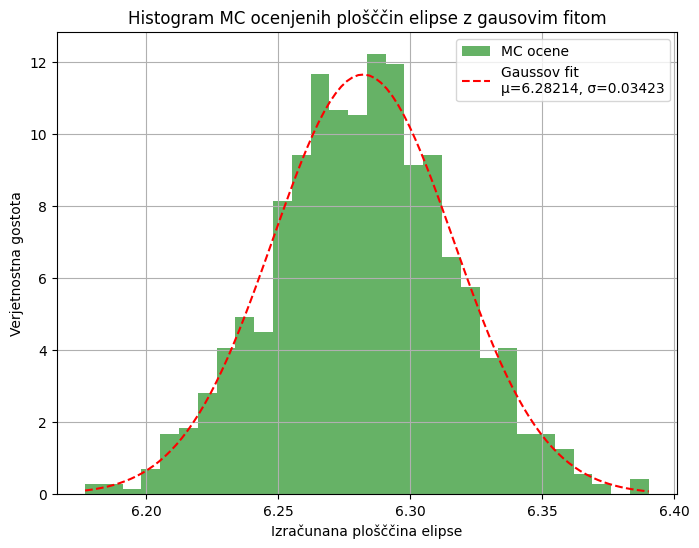

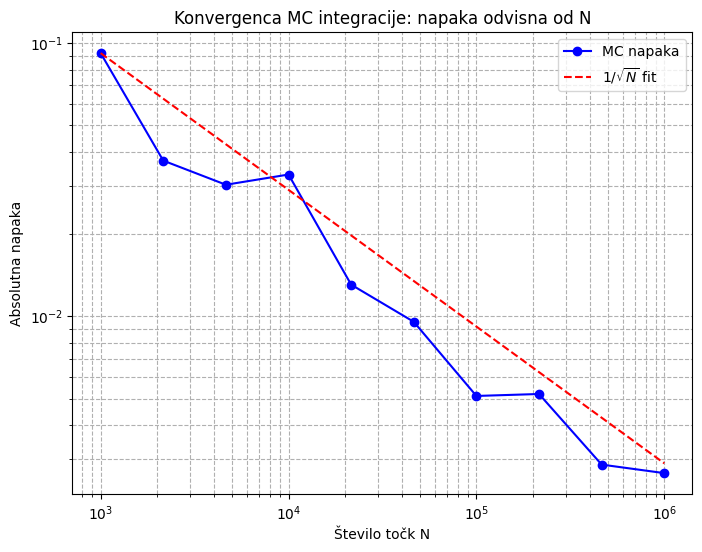

In [20]:
import numpy as np
import time
import math
import matplotlib.pyplot as plt


# Primerjava MC in mrežne metode pri izračunu plošččine elipse

Ns = [1000, 10000, 100000, 1000000]
print("=== Elipsa: MC in Grid metode ===")
print("{:10} {:12} {:12} {:12} {:12}".format("N", "MC area", "Error MC", "Grid area", "Error grid"))
for N in Ns:
    area_mc = ellipse_area_mc(a, b, N)
    area_grid = ellipse_area_grid(a, b, N)
    error_mc = abs(area_mc - true_area)
    error_grid = abs(area_grid - true_area)
    print(f"{N:10d} {area_mc:12.5f} {error_mc:12.5f} {area_grid:12.5f} {error_grid:12.5f}")

# Izračun volumna elipsoida z MC integracijo
Ns_vol = [10000, 100000, 1000000]
print("\n=== Elipsoid: MC metoda ===")
print("{:10} {:12} {:12}".format("N", "MC volume", "Error"))
for N in Ns_vol:
    vol_mc = ellipsoid_volume_mc(a_e, b_e, c_e, N)
    error_vol = abs(vol_mc - true_volume)
    print(f"{N:10d} {vol_mc:12.5f} {error_vol:12.5f}")

#Histogram porazdelitve ocenjenih plošččin elipse in Gaussov fit 

N_hist = 10000   
num_runs = 1000   
areas = np.array([ellipse_area_mc(a, b, N_hist) for _ in range(num_runs)])

plt.figure(figsize=(8, 6))

count, bins, _ = plt.hist(areas, bins=30, density=True, alpha=0.6, color='g', label="MC ocene")

mu_fit = np.mean(areas)
sigma_fit = np.std(areas)

x_fit = np.linspace(bins[0], bins[-1], 100)
gauss = (1/(sigma_fit * np.sqrt(2*np.pi))) * np.exp(- (x_fit - mu_fit)**2 / (2*sigma_fit**2))
plt.plot(x_fit, gauss, 'r--', label=f'Gaussov fit\nμ={mu_fit:.5f}, σ={sigma_fit:.5f}')
plt.xlabel("Izračunana plošččina elipse")
plt.ylabel("Verjetnostna gostota")
plt.title("Histogram MC ocenjenih plošččin elipse z gausovim fitom")
plt.legend()
plt.grid(True)
#plt.savefig('histogram.png')
plt.show()

#Graf konvergence MC napake v odvisnosti od števila točk

Ns_plot = np.logspace(3, 6, 10, dtype=int) 
errors = []
runs = 10 
for N in Ns_plot:
    err_runs = []
    for _ in range(runs):
        area_est = ellipse_area_mc(a, b, N)
        err_runs.append(abs(area_est - true_area))
    errors.append(np.mean(err_runs))
errors = np.array(errors)

plt.figure(figsize=(8,6))
plt.loglog(Ns_plot, errors, 'bo-', label="MC napaka")

# Teoretična krivulja: napaka ~ c / sqrt(N)
# Uporabimo prvo točko za oceno konstante c
c_est = errors[0] * np.sqrt(Ns_plot[0])
theory_errors = c_est / np.sqrt(Ns_plot)
plt.loglog(Ns_plot, theory_errors, 'r--', label=r'$1/\sqrt{N}$ fit')
plt.xlabel("Število točk N")
plt.ylabel("Absolutna napaka")
plt.title("Konvergenca MC integracije: napaka odvisna od N")
plt.legend()
plt.grid(True, which="both", ls="--")
#plt.savefig('konvergenca.png')
plt.show()


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


=== Monte Carlo ocena ploščine elipse ===
Število točk: 2000
Ocenjena ploščina: 6.36800
Prava ploščina:    6.28319
Absolutna napaka:  0.08481


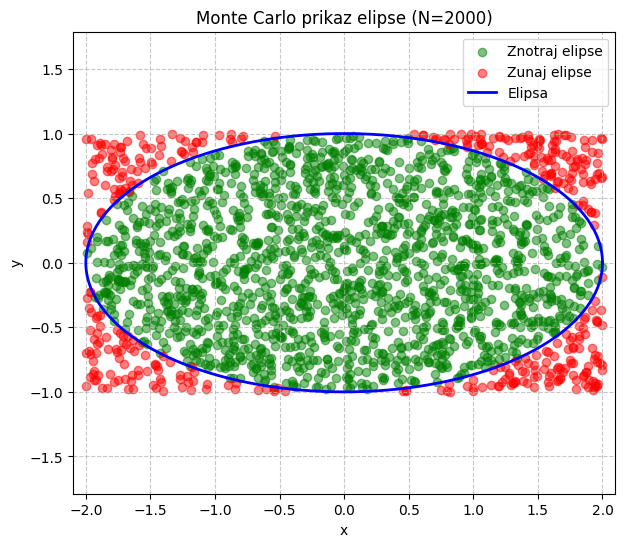


=== Histogram MC porazdelitve ===
N = 10000 točk, število ponovitev = 500
Srednja ocena ploščine = 6.28232
Standardni odklon = 0.03147
Napaka srednje vrednosti = 0.00087


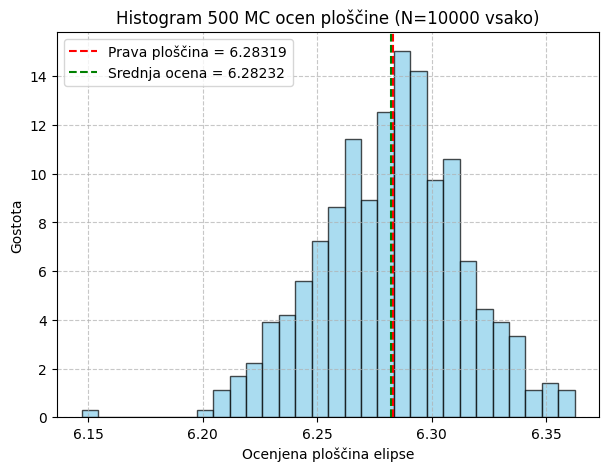

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

def ellipse_area_mc(a, b, N):
    x = np.random.uniform(-a, a, N)
    y = np.random.uniform(-b, b, N)
    inside = (x**2)/(a**2) + (y**2)/(b**2) <= 1
    box_area = 4.0 * a * b
    frac_inside = np.sum(inside) / N
    area_estimate = box_area * frac_inside
    return area_estimate, x, y, inside



N_vis = 2000 
area_est, x_vals, y_vals, inside_mask = ellipse_area_mc(a, b, N_vis)

error_mc = abs(area_est - true_area)

print("=== Monte Carlo ocena ploščine elipse ===")
print(f"Število točk: {N_vis}")
print(f"Ocenjena ploščina: {area_est:.5f}")
print(f"Prava ploščina:    {true_area:.5f}")
print(f"Absolutna napaka:  {error_mc:.5f}")


plt.figure(figsize=(7, 6))
plt.scatter(x_vals[inside_mask], y_vals[inside_mask], color='green', alpha=0.5, label='Znotraj elipse')
plt.scatter(x_vals[~inside_mask], y_vals[~inside_mask], color='red', alpha=0.5, label='Zunaj elipse')


theta = np.linspace(0, 2*np.pi, 300)
x_ell = a * np.cos(theta)
y_ell = b * np.sin(theta)
plt.plot(x_ell, y_ell, color='blue', lw=2, label='Elipsa')

plt.title(f"Monte Carlo prikaz elipse (N={N_vis})")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.xlim(-a*1.05, a*1.05)
plt.ylim(-b*1.05, b*1.05)
plt.legend()
plt.grid(True, ls='--', alpha=0.7)
#plt.savefig('elipsaslika.png')
plt.show()


N_hist = 10000   
num_runs = 500   

areas = []
for _ in range(num_runs):
    area_estimate, _, _, _ = ellipse_area_mc(a, b, N_hist)
    areas.append(area_estimate)

areas = np.array(areas)
mean_area = np.mean(areas)
std_area = np.std(areas)
error_mean = abs(mean_area - true_area)

print("\n=== Histogram MC porazdelitve ===")
print(f"N = {N_hist} točk, število ponovitev = {num_runs}")
print(f"Srednja ocena ploščine = {mean_area:.5f}")
print(f"Standardni odklon = {std_area:.5f}")
print(f"Napaka srednje vrednosti = {error_mean:.5f}")

plt.figure(figsize=(7, 5))
plt.hist(areas, bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True)
plt.axvline(x=true_area, color='red', linestyle='--', label=f'Prava ploščina = {true_area:.5f}')
plt.axvline(x=mean_area, color='green', linestyle='--', label=f'Srednja ocena = {mean_area:.5f}')
plt.title(f"Histogram {num_runs} MC ocen ploščine (N={N_hist} vsako)")
plt.xlabel("Ocenjena ploščina elipse")
plt.ylabel("Gostota")
plt.legend()
plt.grid(True, ls='--', alpha=0.7)
#plt.savefig('histogram2.png')
plt.show()


 Integral standardne normalne porazdelitve (μ=0, σ=1)

--- Interval [-1, 1] ---
Prava vrednost integrala: 0.682689

      Metoda      Integral        Napaka     Čas (s)
    Trapezna      0.682689      0.000000      0.0110
          MC      0.682843      0.000154      0.0080
      IS μ=0      0.679170      0.003519      0.0080
    IS μ=0.5      0.686794      0.004104      0.0070
    IS μ=1.0      0.683206      0.000517      0.0080
    IS μ=2.0      0.678209      0.004481      0.0070


C:\Users\Gašper Harej\AppData\Local\Temp\ipykernel_2604\2941842384.py:15: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(y, x)
C:\Users\Gašper Harej\AppData\Local\Temp\ipykernel_2604\2941842384.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(method_names, rotation=45, ha="right")
C:\Users\Gašper Harej\AppData\Local\Temp\ipykernel_2604\2941842384.py:102: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(method_names, rotation=45, ha="right")


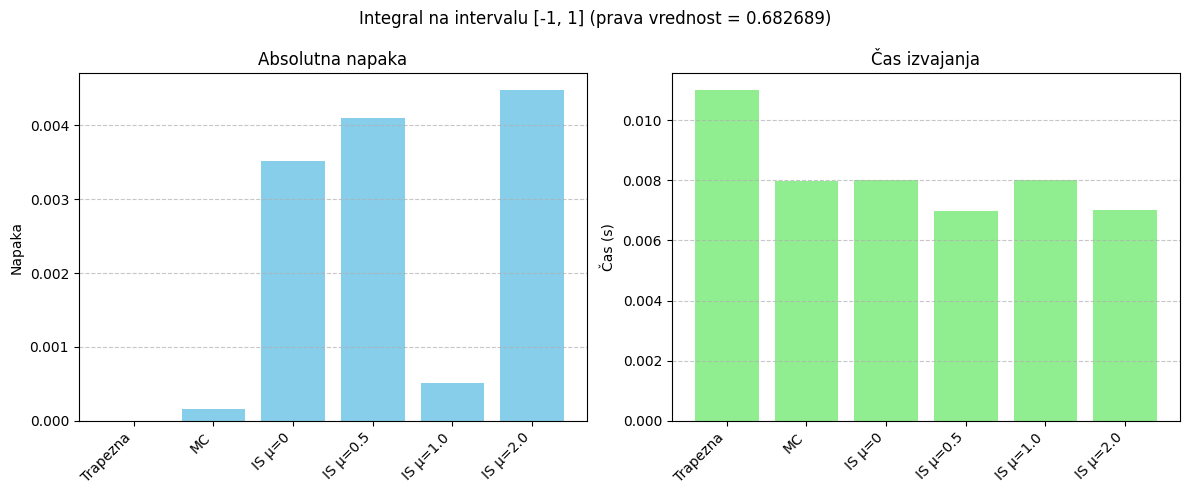


--- Interval [-2, 2] ---
Prava vrednost integrala: 0.954500

      Metoda      Integral        Napaka     Čas (s)
    Trapezna      0.954500      0.000000      0.0070
          MC      0.954883      0.000384      0.0070
      IS μ=0      0.953470      0.001030      0.0050
    IS μ=0.5      0.957138      0.002639      0.0060
    IS μ=1.0      0.953652      0.000848      0.0070
    IS μ=2.0      0.933118      0.021382      0.0070


C:\Users\Gašper Harej\AppData\Local\Temp\ipykernel_2604\2941842384.py:15: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(y, x)
C:\Users\Gašper Harej\AppData\Local\Temp\ipykernel_2604\2941842384.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(method_names, rotation=45, ha="right")
C:\Users\Gašper Harej\AppData\Local\Temp\ipykernel_2604\2941842384.py:102: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(method_names, rotation=45, ha="right")


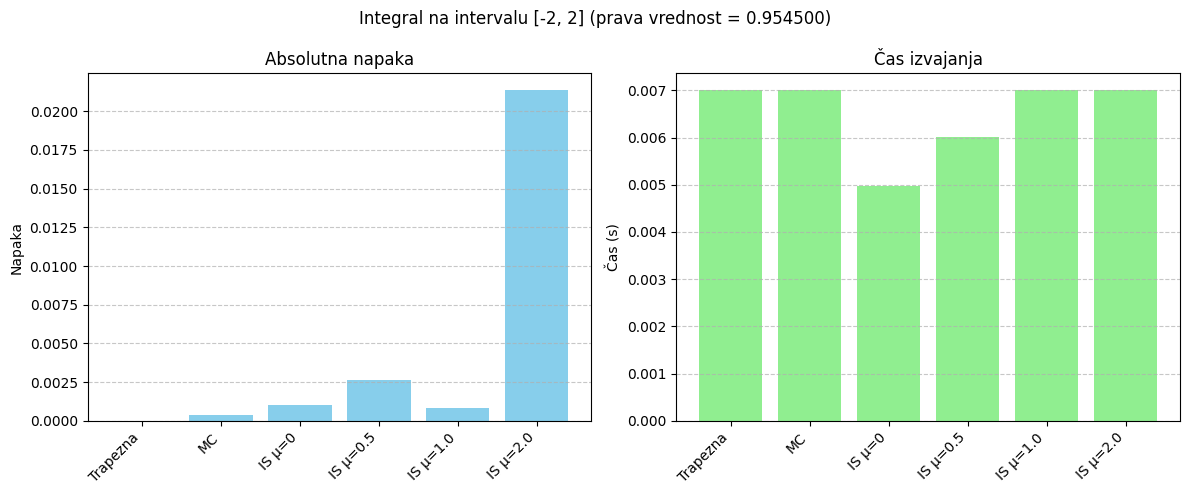


--- Interval [-3, 3] ---
Prava vrednost integrala: 0.997300

      Metoda      Integral        Napaka     Čas (s)
    Trapezna      0.997300      0.000000      0.0110
          MC      0.999005      0.001704      0.0050
      IS μ=0      0.997120      0.000180      0.0070
    IS μ=0.5      0.997455      0.000155      0.0060
    IS μ=1.0      1.002861      0.005561      0.0050
    IS μ=2.0      0.971922      0.025378      0.0080


C:\Users\Gašper Harej\AppData\Local\Temp\ipykernel_2604\2941842384.py:15: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(y, x)
C:\Users\Gašper Harej\AppData\Local\Temp\ipykernel_2604\2941842384.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(method_names, rotation=45, ha="right")
C:\Users\Gašper Harej\AppData\Local\Temp\ipykernel_2604\2941842384.py:102: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(method_names, rotation=45, ha="right")


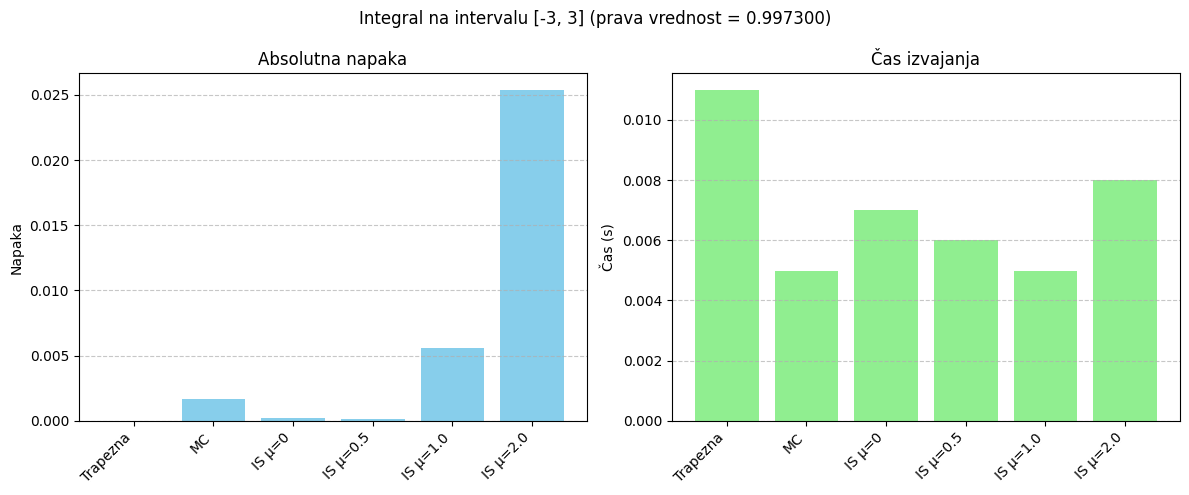

In [25]:
import numpy as np
import time
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

def true_gaussian_integral(a, b):
    
    return norm.cdf(b) - norm.cdf(a)

def gaussian_trapezoidal(a, b, n_points):
    
    x = np.linspace(a, b, n_points)
    y = norm.pdf(x)
    integral = np.trapz(y, x)
    return integral

def gaussian_mc(a, b, N):

    x = np.random.uniform(a, b, N)
    y = norm.pdf(x)
    integral = (b - a) * np.mean(y)
    return integral

def gaussian_importance_sampling(a, b, N, mu_is):

    x = np.random.normal(loc=mu_is, scale=1, size=N)
    weights = np.exp(-mu_is * x + (mu_is**2)/2) 
    indicator = (x >= a) & (x <= b)
    integral = np.mean(weights * indicator)
    return integral


intervals = [(-1, 1), (-2, 2), (-3, 3)]  
n_trap = 100000    
N_mc   = 100000 
mus    = [0, 0.5, 1.0, 2.0]

print(" Integral standardne normalne porazdelitve (μ=0, σ=1)")


for (a, b) in intervals:
    true_val = true_gaussian_integral(a, b)
    print(f"\n--- Interval [{a}, {b}] ---")
    print(f"Prava vrednost integrala: {true_val:.6f}\n")

    method_names = []
    method_values = []
    method_errors = []
    method_times = []


    start_time = time.time()
    trap_val = gaussian_trapezoidal(a, b, n_trap)
    t_trap = time.time() - start_time
    err_trap = abs(trap_val - true_val)
    
    method_names.append("Trapezna")
    method_values.append(trap_val)
    method_errors.append(err_trap)
    method_times.append(t_trap)
    
    start_time = time.time()
    mc_val = gaussian_mc(a, b, N_mc)
    t_mc = time.time() - start_time
    err_mc = abs(mc_val - true_val)
    
    method_names.append("MC")
    method_values.append(mc_val)
    method_errors.append(err_mc)
    method_times.append(t_mc)
    

    for mu_is in mus:
        start_time = time.time()
        imp_val = gaussian_importance_sampling(a, b, N_mc, mu_is)
        t_imp = time.time() - start_time
        err_imp = abs(imp_val - true_val)
        
        method_names.append(f"IS μ={mu_is}")
        method_values.append(imp_val)
        method_errors.append(err_imp)
        method_times.append(t_imp)
    

    print(f"{'Metoda':>12}  {'Integral':>12}  {'Napaka':>12}  {'Čas (s)':>10}")
    for i, m_name in enumerate(method_names):
        print(f"{m_name:>12}  {method_values[i]:12.6f}  {method_errors[i]:12.6f}  {method_times[i]:10.4f}")
    
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f"Integral na intervalu [{a}, {b}] (prava vrednost = {true_val:.6f})")

    axs[0].bar(method_names, method_errors, color='skyblue')
    axs[0].set_title("Absolutna napaka")
    axs[0].set_xticklabels(method_names, rotation=45, ha="right")
    axs[0].set_ylabel("Napaka")
    axs[0].grid(axis='y', linestyle='--', alpha=0.7)
    
    axs[1].bar(method_names, method_times, color='lightgreen')
    axs[1].set_title("Čas izvajanja")
    axs[1].set_xticklabels(method_names, rotation=45, ha="right")
    axs[1].set_ylabel("Čas (s)")
    axs[1].grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    #plt.savefig(f'interval_{a}_{b}.png')
    plt.show()
